In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [10]:
iris = load_iris()
df_data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species'])

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


K-means 演算法在 Sklearn 套件中已經幫我們封裝好了，使用者只要呼叫 API 即可將分群分類演算法快速實作。

Parameters:
<br>
n_cluster: K的大小，也就是分群的類別數量。<br>
random_state: 亂數種子，設定常數能夠保證每次分群結果都一樣。<br>
n_init: 預設為10次隨機初始化，選擇效果最好的一種來作為模型。<br>
max_iter: 迭代次數，預設為300代。<br>

Attributes:<br>
inertia_: inertia_：float，每個點到其他叢集的質心的距離之和。<br>
cluster_centers_： 特徵的中心點 [n_clusters, n_features]。<br>

Methods:<br>
fit: K個集群分類模型訓練。<br>
predict: 預測並回傳類別。<br>
fit_predict: 先呼叫fit()做集群分類，之後在呼叫predict()預測最終類別並回傳輸出。<br>
transform: 回傳的陣列每一行是每一個樣本到kmeans中各個中心點的L2(歐幾里得)距離。<br>
fit_transform: 先呼叫fit()再執行transform()。<br>

In [3]:
from sklearn.cluster import KMeans

kmeansModel = KMeans(n_clusters=3, random_state=50,max_iter=300)
clusters_pred = kmeansModel.fit_predict(df_data)

In [4]:
kmeansModel.inertia_

87.22062785114048

In [5]:
kmeansModel.cluster_centers_

array([[5.91568627, 2.76470588, 4.26470588, 1.33333333, 1.01960784],
       [5.006     , 3.428     , 1.462     , 0.246     , 0.        ],
       [6.62244898, 2.98367347, 5.57346939, 2.03265306, 2.        ]])

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


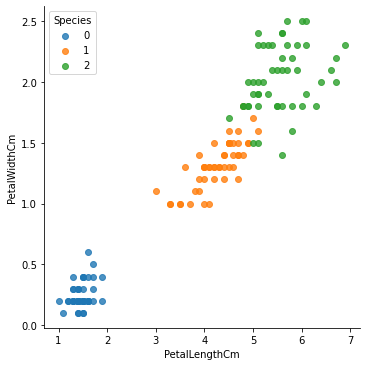

In [6]:
sns.lmplot("PetalLengthCm", "PetalWidthCm", hue='Species', data=df_data, fit_reg=False, legend=False)
plt.legend(title='Species', loc='best', labels=['0', '1', '2'])

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

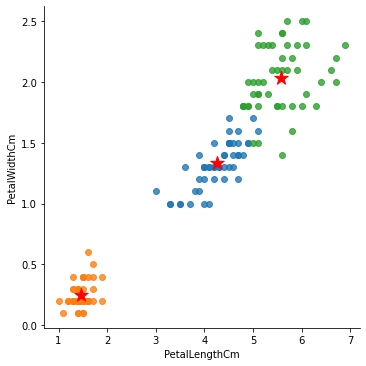

In [7]:
df_data['Predict']=clusters_pred
sns.lmplot("PetalLengthCm", "PetalWidthCm", hue='Predict', data=df_data, fit_reg=False, legend=False)
plt.scatter(kmeansModel.cluster_centers_[:,2],kmeansModel.cluster_centers_[:,3], s=200, c='r', marker='*')
plt.show

In [8]:
# k = 1~9 做9次kmeans, 並將每次結果的inertia收集在一個list裡
kmeans_list = [KMeans(n_clusters=k, random_state=46).fit(df_data)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_list]

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


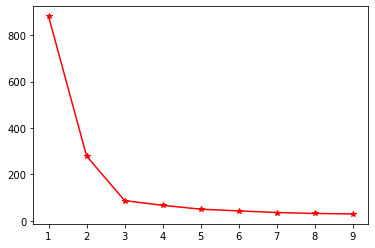

In [9]:
k = [k for k in range(1, 10)]
plt.plot(k, inertias, 'r-*')   # red line without marker
plt.show()